This is example is designed to run when some input is connected to channel 3 of the ID801: for example, a function generator at 1.5kHz is used.

In [1]:
from id801 import ID801, FileFormat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
id801 = ID801()

In [3]:
TDC_UNIT = id801.get_timebase()
print(f"TDC unit: {TDC_UNIT} s")

TDC unit: 8.09552722121028e-11 s


## Storing in .txt file

In [4]:
id801.record_real_timestamps_to_file("real_timestamps_1.txt", FileFormat.FORMAT_ASCII, 100)
id801.record_real_timestamps_to_file("real_timestamps_2.txt", FileFormat.FORMAT_ASCII, 100)

Data Lost: 0
Data Lost: 0


In [5]:
df1 = pd.read_csv("real_timestamps_1.txt", sep=",", names=["timestamp", "channel"])
df1

,timestamp,channel
0,319498864,3
1,320116462,3
2,320734077,3
3,321351690,3
4,321969284,3
...,...,...
1959,1529389365,3
1960,1530006963,3
1961,1530624578,3
1962,1531242179,3


In [6]:
df2 = pd.read_csv("real_timestamps_2.txt", sep=",", names=["timestamp", "channel"])
df2

,timestamp,channel
0,1532477390,3
1,1533095003,3
2,1533712599,3
3,1534330212,3
4,1534947814,3
...,...,...
1958,2741750289,3
1959,2742367903,3
1960,2742985516,3
1961,2743603120,3


In [7]:
df2["timestamp"][0]

1532477390

In [8]:
t_signal = (df1["timestamp"][1] - df1["timestamp"][0]) * TDC_UNIT
t_betweenFile = (df2["timestamp"][0] - df1["timestamp"][len(df1)-1]) * TDC_UNIT

print(f"Time between signals: {t_signal:e}")
print(f"Signal frequency: {1/t_signal:e}")
print(f"Time between files: {t_betweenFile:e}")
print(f"Ratio of time between files and time between signals: {t_betweenFile/t_signal}")

Time between signals: 4.999781e-05
Signal frequency: 2.000087e+04
Time between files: 4.999749e-05
Ratio of time between files and time between signals: 0.9999935232950884


## Storing in NumPy array

In [9]:
timestamps_1, channels_1 = id801.get_timestamps(100)
timestamps_2, channels_2 = id801.get_timestamps(100)

timestamps_1 = timestamps_1[np.where(channels_1 == 2)]
timestamps_2 = timestamps_2[np.where(channels_2 == 2)]

Valid Timestamps: 1964
Valid Timestamps: 2086


In [10]:
t_signal = (timestamps_1[1] - timestamps_1[0]) * TDC_UNIT
t_betweenFile = (timestamps_2[0] - timestamps_1[len(timestamps_1)-1]) * TDC_UNIT

print(f"Time between signals: {t_signal:e}")
print(f"Signal frequency: {1/t_signal:e}")
print(f"Time between files: {t_betweenFile:e}")
print(f"Ratio of time between files and time between signals: {t_betweenFile/t_signal}")

Time between signals: 4.999870e-05
Signal frequency: 2.000052e+04
Time between files: 4.999765e-05
Ratio of time between files and time between signals: 0.9999789510839382


## Fill in NumPy array

In [11]:
buffer_size = 1_000_000

np_timestamps_1 = np.ndarray(buffer_size, dtype=np.int64)
np_channels_1 = np.ndarray(buffer_size, dtype=np.int8)

np_timestamps_2 = np.ndarray(buffer_size, dtype=np.int64)
np_channels_2 = np.ndarray(buffer_size, dtype=np.int8)

valid_1 = id801.fill_array_with_timestamps(np_timestamps_1, np_channels_1, 100)
valid_2 = id801.fill_array_with_timestamps(np_timestamps_2, np_channels_2, 100)

np_channels_1 = np_channels_1[:valid_1]
np_timestamps_1 = np_timestamps_1[:valid_1][np.where(np_channels_1 == 2)]

np_channels_2 = np_channels_2[:valid_2]
np_timestamps_2 = np_timestamps_2[:valid_2][np.where(np_channels_2 == 2)]

Valid Timestamps: 1964
Valid Timestamps: 1963


In [12]:
t_signal = (np_timestamps_1[1] - np_timestamps_1[0]) * TDC_UNIT
t_betweenFile = (np_timestamps_2[0] - np_timestamps_1[len(np_timestamps_1)-1]) * TDC_UNIT

print(f"Time between signals: {t_signal:e}")
print(f"Signal frequency: {1/t_signal:e}")
print(f"Time between files: {t_betweenFile:e}")
print(f"Ratio of time between files and time between signals: {t_betweenFile/t_signal}")

Time between signals: 4.999895e-05
Signal frequency: 2.000042e+04
Time between files: 4.999830e-05
Ratio of time between files and time between signals: 0.999987046883804


## Coincidence

In [13]:
id801.switch_termination(False)
id801.set_coincidence_window(100)
id801.set_exposure_time(100)
data, labels, updates = id801.get_last_coinc_counters(100, 500)
print(data)
print(updates)

[0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13


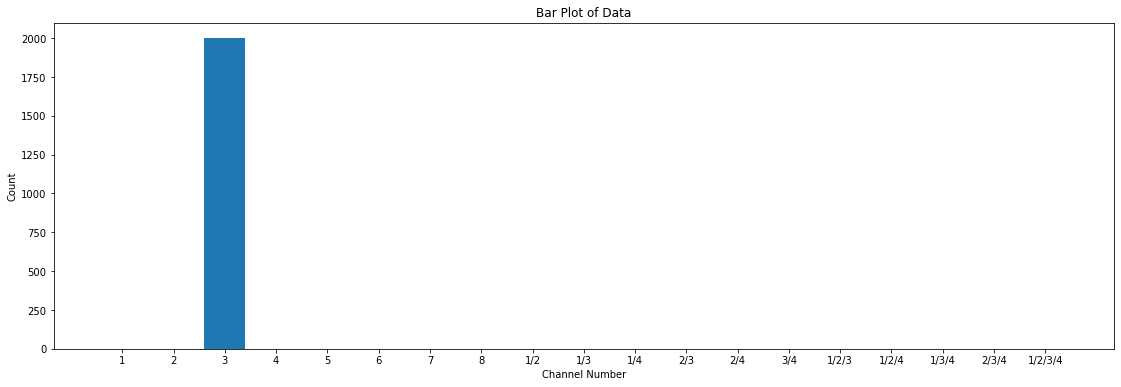

In [14]:
fig = plt.figure(figsize=(19, 6))
plt.bar(labels, data)
plt.xlabel('Channel Number')
plt.ylabel('Count')
plt.title('Bar Plot of Data')
plt.show()